# EDA - Análisis exploratorio de datos

### 1. Situación a resolver y contexto.

Este análisis exploratorio de datos (EDA) se enfocará en entender y visualizar las características de los siniestros viales en la Ciudad de Buenos Aires entre 2016 y 2021, con el objetivo de identificar patrones, tendencias y áreas críticas que permitan a las autoridades locales tomar decisiones informadas para reducir las víctimas fatales. Se explorarán valores faltantes, outliers y duplicados, acompañados de visualizaciones adecuadas para cada tipo de variable.

Posteriormente se realizará la ingesta de los datos resultantes de este análisis en una __base de datos MySQL__ que permitirá escalar el presente proyecto a medida que se generan nuevos datos. 

### 2. Importar librerías.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import folium
import pymysql
from functions import limpiar_data
from functions import create_mysql_db
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from IPython.display import Image

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

### 3. Ingesta de datos.
En esta etapa haré la carga de los datasets limpios y exportados en formato ".csv". Los archivos resultantes son producto de los archivos de base que se encontraban en formato EXCEL y corresponde a homicidios.xlsx y lesiones.xslx - Ambos con dos hojas en su interior, de "HECHOS" y "VICTIMAS".

Para fácilitar y óptimizar el tratamiento de los datos, fusioné las hojas mediante un INNER JOIN, y se generaron dos archivos resultantes: 'homicidios_cln.csv' y 'lesiones_cln.csv'. Ahora limpios estos archivos procedo a realizar el análisis de la data.

In [3]:
# Cargar datasets

homicidios_df = pd.read_csv('DataSets/homicidios_cln.csv')
lesiones_df = pd.read_csv('DataSets/lesiones_cln.csv')

In [4]:
homicidios_df.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30.0,fatal
3,2016-0004,1,2016-01-10,0.0,avenida,8,-58.46503904,-34.68092974,moto,NaN,conductor,masculino,18.0,fatal
4,2016-0005,1,2016-01-21,5.0,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29.0,fatal


In [5]:
lesiones_df.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,NaN,masculino,57.0,leve
2,LC-2019-0000063,1,2019-01-01,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,NaN,leve
3,LC-2019-0000079,1,2019-01-01,2.0,NaN,7.0,-58.437425,-34.647349,peaton,NaN,NaN,masculino,NaN,leve
4,LC-2019-0000082,4,2019-01-01,4.0,NaN,3.0,-58.398225,-34.604579,auto,NaN,NaN,masculino,45.0,leve


### 3. Exploración del conjunto de datos. (homicidios_df, lesiones_df).

In [6]:
print("Dimensionamiento del set de datos homicidios_df")
homicidios_df.shape

Dimensionamiento del set de datos homicidios_df


(717, 14)

In [7]:
print("Dimensionamiento del set de datos lesiones_df")
lesiones_df.shape

Dimensionamiento del set de datos lesiones_df


(27599, 14)

In [8]:
# Obtenemos conteo de valores nulos en columna de homicidios_df
null_count = homicidios_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
total_reg = homicidios_df.shape[0]

null_info = pd.DataFrame({"null count": null_count})

null_percentage = (null_count / total_reg)

    
print(null_info)
print(f"SUMA DE NULOS:", null_info["null count"].sum())
print(f"PORCENTAJE DE NULOS:{((null_count.sum() / total_reg) * 100).round(2)}%")

                  null count
id_siniestro               0
nro_victimas               0
fecha                      0
franja_hora                1
tipo_calle                 0
comuna                     0
longitud                   0
latitud                    0
vehiculo_victima           9
vehiculo_acusado          23
rol                       11
sexo                       6
edad                      53
gravedad                   0
SUMA DE NULOS: 103
PORCENTAJE DE NULOS:14.37%


In [9]:
# Obtenemos conteo de valores nulos en columna de homicidios_df
null_count2 = lesiones_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
total_reg2 = lesiones_df.shape[0]*lesiones_df.shape[1]

null_info2 = pd.DataFrame({"null count": null_count2})

null_percentage2 = (null_count / total_reg)

    
print(null_info2)
print(f"SUMA DE NULOS:", null_info2["null count"].sum())
print(f"PORCENTAJE DE NULOS:{((null_count2.sum()/total_reg2) * 100).round(2)}%")

                  null count
id_siniestro               0
nro_victimas               0
fecha                      0
franja_hora                9
tipo_calle             12880
comuna                  1625
longitud                1657
latitud                 1657
vehiculo_victima       12823
vehiculo_acusado       17919
rol                    27599
sexo                    2228
edad                    4471
gravedad                   0
SUMA DE NULOS: 82868
PORCENTAJE DE NULOS:21.45%


Con relación a los dataframes anteriores, vemos que aunque se realizó la imputación de algunos valores nulos, opté por no elminarles completamente, debido que aún pueden ser útiles y podrían evitar sesgos en el análisis. 

Con relación al df "__homicios_df__" el valor de nulos es de 103, lo cual representa solo un 14.37% del total de los registros. Sin embargo, el df "__lesiones_df__" tiene 82.868 valores faltantes que representan el 21.45% del dataset. Las columnas más afectadas son: *'comuna', 'longitud', 'latitud', 'sexo', 'edad', 'tipo_calle', 'rol', 'vehiculo_victima', 'vehiculo_acusado'*.

Dado que ambos dataframes contienen información relevante sobre las víctimas y las circunstancias de los siniestros, es beneficioso concatenarlos verticalmente para obtener una visión más integral. Sin embargo, se abordarán sólo los siniestros fatales para las columnas 'tipo_calle', 'rol', 'vehiculo_victima' y 'vehiculo_acusado'. Unificaré los datos en 'siniestros_viales.csv' y clasificaré las muestras en dos grupos: Siniestros con víctimas fatales (al menos una persona fallecida en el acto o hasta treinta días después) y Siniestros con lesionados (al menos un herido y sin víctimas fatales).

### 4. Concatenación del conjunto de datos.

In [10]:
# Concatenar los dos DataFrames verticalmente 

siniestros = pd.concat([homicidios_df, lesiones_df], ignore_index=True)

# Verifica el resultado
print(siniestros.shape) 

(28316, 14)


In [11]:
# Columnas para ser agregadas

# Convertimos la columna 'fecha' a tipo datetime
siniestros['fecha'] = pd.to_datetime(siniestros['fecha'])

# Crear nuevas columnas: year, month, quarter, semester
siniestros['year'] = siniestros['fecha'].dt.year
siniestros['month'] = siniestros['fecha'].dt.month
siniestros['quarter'] = siniestros['fecha'].dt.quarter
siniestros['semester'] = siniestros['fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

# Nuevas columnas
new_columns_dict = {'year': 'year', 'month': 'month', 'quarter': 'quarter', 'semester': 'semester'}

In [12]:
# Convertir a entero

columns_to_int = [ 'nro_victimas','franja_hora','comuna', 'edad']

In [13]:
# Categorización de columnas

columns_to_categorize = ['franja_hora', 'tipo_calle', 'comuna', 'vehiculo_victima', 
                         'vehiculo_acusado', 'rol', 'sexo', 'edad', 'gravedad']

In [14]:
# Invocamos la función limpiar_data

siniestros_df = limpiar_data(siniestros,
                              new_columns2=new_columns_dict,  #Agregar columnas
                              convert_to_int_columns=columns_to_int, #Conversión entero  
                              categorize_columns=columns_to_categorize # Categorizar columnas
                             )

In [15]:
siniestros_df.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
0,2016-0001,1,2016-01-01,4,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19,fatal,2016,1,1,1
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70,fatal,2016,1,1,1
2,2016-0003,1,2016-01-03,7,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30,fatal,2016,1,1,1
3,2016-0004,1,2016-01-10,0,avenida,8,-58.46503904,-34.68092974,moto,NaN,conductor,masculino,18,fatal,2016,1,1,1
4,2016-0005,1,2016-01-21,5,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29,fatal,2016,1,1,1


In [16]:
siniestros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      28316 non-null  object        
 1   nro_victimas      28316 non-null  Int64         
 2   fecha             28316 non-null  datetime64[ns]
 3   franja_hora       28306 non-null  Int64         
 4   tipo_calle        15436 non-null  category      
 5   comuna            26691 non-null  Int64         
 6   longitud          26659 non-null  object        
 7   latitud           26659 non-null  object        
 8   vehiculo_victima  15484 non-null  category      
 9   vehiculo_acusado  10374 non-null  category      
 10  rol               706 non-null    category      
 11  sexo              26082 non-null  category      
 12  edad              23792 non-null  Int64         
 13  gravedad          28316 non-null  category      
 14  year              2831

El conjunto de datos resultante consta de 28.316 registros. A continuación la descripción de las columnas disponibles y el tipo de dato que contienen.

*__id_siniestro:__* Identificador único del siniestro (tipo: object).

*__nro_victimas:__* Cantidad de víctimas involucradas en el siniestro (tipo: int64).

*__fecha:__* Fecha en que ocurrió el siniestro (tipo: datetime64[ns]).

__*franja_hora:*__ Intervalo de tiempo durante el cual ocurrió el siniestro (tipo: category).

*__tipo_calle:__* Categoría de la calle donde ocurrió el siniestro (tipo: category).

*__comuna:__* Comuna del lugar del siniestro (tipo: category).

*__longitud:__* Coordenada geográfica de longitud (tipo: object).

*__latitud:__* Coordenada geográfica de latitud (tipo: object).

*__vehiculo_victima:__* Tipo de vehículo en el que viajaba la víctima (tipo: category).

*__vehiculo_acusado:__* Tipo de vehículo acusado (tipo: category).

*__rol:__* Rol específico en el siniestro (tipo: category).

*__sexo:__* Género de los involucrados (tipo: category).

*__edad:__* Edad de los involucrados (tipo: category).

*__gravedad:__* Nivel de gravedad del siniestro (tipo: category).

*__year:__* Año en que ocurrió el siniestro (tipo: int64).

*__month:__* Mes en que ocurrió el siniestro (tipo: int64).

*__quarter:__* Trimestre en que ocurrió el siniestro (tipo: int64).

*__semester:__* Semestre en que ocurrió el siniestro (tipo: int64).

### 5. Revisión de valores nulos o faltantes.

Haré la revisión de las columnas categóricas que presentan datos faltantes, con el objetivo de tomar la decisión de si imputarlas o no. En el caso de decidir imputarlas, preferiblemente se establecería mediante un modelo de machine learning. 

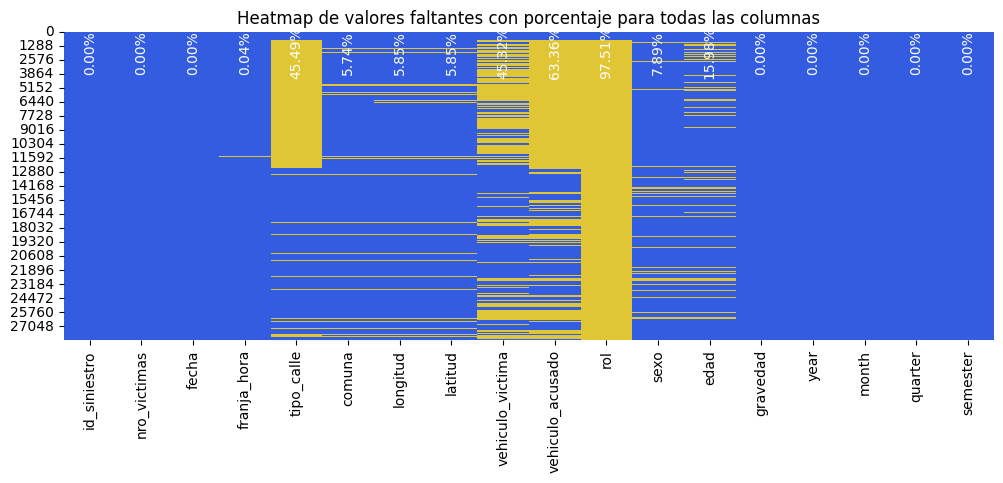

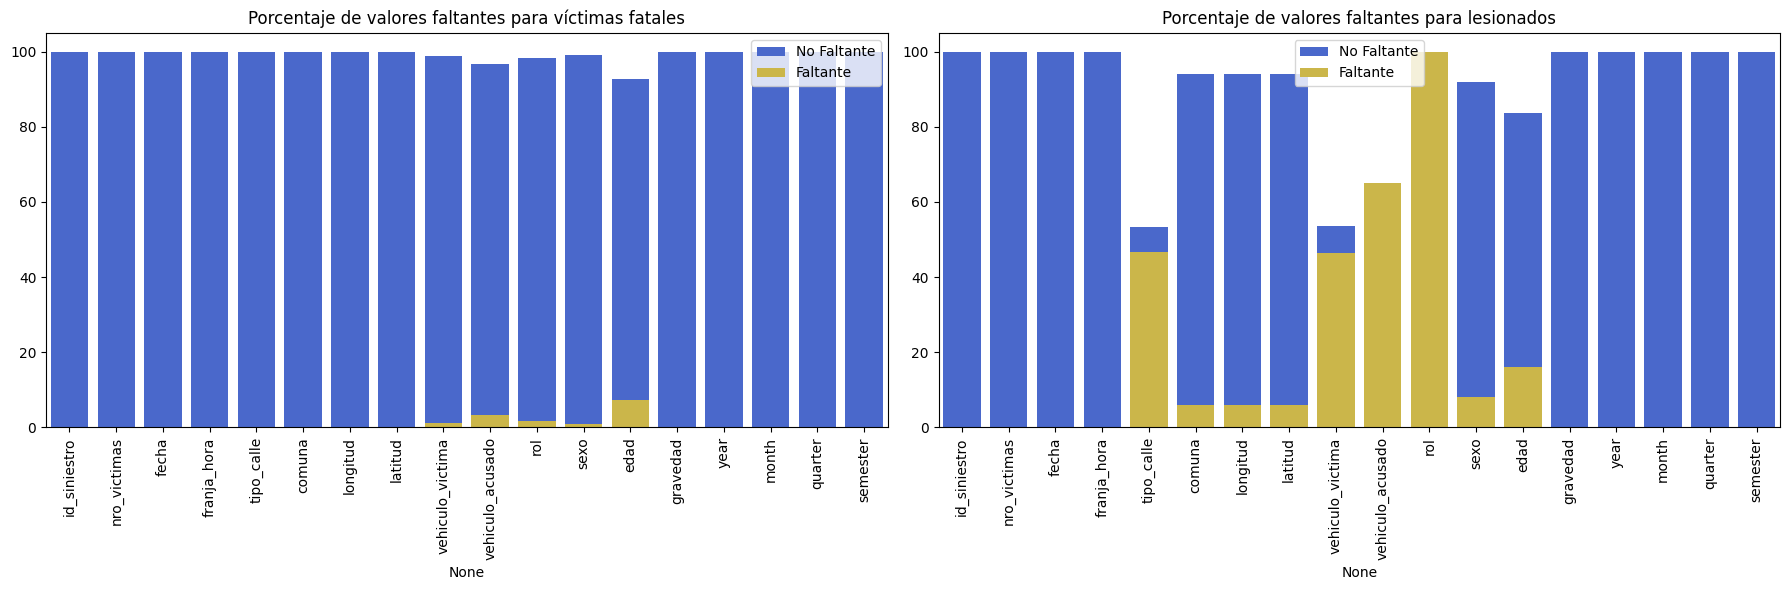

In [17]:
# Calcular el porcentaje de datos faltantes por columna
pct_nulos = siniestros_df.isnull().mean() * 100

# Seleccionar solo registros con víctimas fatales
df_fatales = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Seleccionar solo registros con lesionados (gravedad distinta de fatal)
df_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Calcular el porcentaje de datos faltantes por columna para registros fatales
pct_nulos_fatales = df_fatales.isnull().mean() * 100

# Calcular el porcentaje de datos faltantes por columna para registros lesionados
pct_nulos_lesionados = df_lesionados.isnull().mean() * 100

# Crear una paleta de colores personalizada
color_palette = sns.color_palette(['#345CE0', '#E0C534'])

# Crear un heatmap de valores faltantes con el porcentaje
plt.figure(figsize=(12, 4))
sns.heatmap(siniestros_df.isnull(), cbar=False, cmap=color_palette)

# Agregar texto con el porcentaje de datos faltantes en cada columna
for columna, pct in pct_nulos.items():
    plt.text(siniestros_df.columns.get_loc(columna) + 0.5, 1900, f'{pct:.2f}%', rotation=90,
             va='center', ha='center', color='white')

plt.title('Heatmap de valores faltantes con porcentaje para todas las columnas')
plt.show()

# Configurar los subgráficos
fig, ejes = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Porcentaje de valores faltantes para registros fatales
sns.barplot(x=pct_nulos_fatales.index, y=100 - pct_nulos_fatales.values, color=color_palette[0], label='No Faltante', ax=ejes[0])
sns.barplot(x=pct_nulos_fatales.index, y=pct_nulos_fatales.values, color=color_palette[1], label='Faltante', ax=ejes[0])
ejes[0].set_title('Porcentaje de valores faltantes para víctimas fatales')
ejes[0].set_xticklabels(ejes[0].get_xticklabels(), rotation=90)
ejes[0].legend()

# Segundo gráfico: Porcentaje de valores faltantes para registros lesionados
sns.barplot(x=pct_nulos_lesionados.index, y=100 - pct_nulos_lesionados.values, color=color_palette[0], label='No Faltante', ax=ejes[1])
sns.barplot(x=pct_nulos_lesionados.index, y=pct_nulos_lesionados.values, color=color_palette[1], label='Faltante', ax=ejes[1])
ejes[1].set_title('Porcentaje de valores faltantes para lesionados')
ejes[1].set_xticklabels(ejes[1].get_xticklabels(), rotation=90)
ejes[1].legend()

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


__Conclusiones sobre los valores faltantes y su tratamiento__

1) Dado que el porcentaje de datos faltantes es bastante más bajo en el lado de las víctimas fatales, considero que no es necesario usar ningún algoritmo de machine learning para realizar la imputación de dichos valores.
2) Con relación al propósito del proyecto de Data Analytics, cuyo objetivo es el de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales con dos importantes KPIs: (*Reducir en un 10% la tasa de homicidios en siniestros viales* y *Reducir en un 7% la cantidad de accidentes mortales de motociclistas*), lo mejor es enfocarse en la información correspondiente a víctimas. 
3) Sobre el dataset de lesionados podemos posteriormente, trabajar la generación de un tercer KPI que sea de utilidad para el propósito de reducir homicidios, ya que un accidente de transito representa en si mismo, una alta probabilidad de muerte. 

### 6. Búsqueda y tratamiento de posibles duplicados.

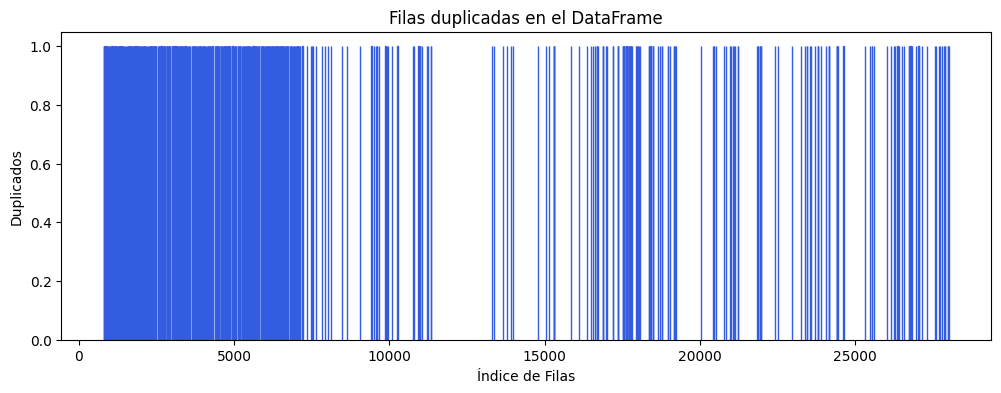

In [18]:
# Identificar filas duplicadas
filas_duplicadas = siniestros_df[siniestros_df.duplicated()]

# Crear un gráfico de barras para mostrar la cantidad de duplicados en cada fila
plt.figure(figsize=(12,4))
plt.bar(filas_duplicadas.index, height=1, color='red', edgecolor='#345CE0', linewidth=1, label='Duplicados')
plt.title('Filas duplicadas en el DataFrame')
plt.xlabel('Índice de Filas')
plt.ylabel('Duplicados')
plt.show()


En el gráfico anterior identificamos el indice de las filas que tienen duplicados y cantidad de duplicados en cada fila. Ahora procedo a revisar las filas duplidas en el dataframe.

In [19]:
# Obtener filas duplicadas completas

filas_duplicadas = siniestros_df[siniestros_df.duplicated()]
filas_duplicadas.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
796,LC-2019-0006638,2,2019-01-04,9,NaN,10,-58.496239,-34.636075,moto,NaN,NaN,masculino,37,leve,2019,1,1,1
812,LC-2019-0008238,2,2019-01-04,19,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve,2019,1,1,1
818,LC-2019-0008388,3,2019-01-04,20,NaN,15,-58.454242,-34.585794,NaN,NaN,NaN,femenino,<NA>,leve,2019,1,1,1
835,LC-2019-0008860,3,2019-01-05,6,NaN,4,-58.412835,-34.655086,transporte publico,NaN,NaN,masculino,67,leve,2019,1,1,1
848,LC-2019-0009807,2,2019-01-05,20,NaN,9,-58.465951,-34.658307,NaN,NaN,NaN,masculino,40,leve,2019,1,1,1


Ahora consulto a manera de prueba, con uno de los ids resultantes del df anterior. Se evidencia que existen 2 victimas para este accidente. Esto explica el por qué de los duplicados, por tal motivo se toma la decisión de generar una nueva columna que asigne un id para cada victima dentro de cada sinistro. 

In [20]:
siniestros_df[siniestros_df["id_siniestro"] == "LC-2019-0008238"]

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
811,LC-2019-0008238,2,2019-01-04,19,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve,2019,1,1,1
812,LC-2019-0008238,2,2019-01-04,19,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve,2019,1,1,1


In [21]:
# Creación de nueva columna para identificar a cada víctima. 

siniestros_df['id_victima'] = siniestros_df.groupby('id_siniestro').cumcount() + 1
siniestros_df.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester,id_victima
0,2016-0001,1,2016-01-01,4,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19,fatal,2016,1,1,1,1
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70,fatal,2016,1,1,1,1
2,2016-0003,1,2016-01-03,7,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30,fatal,2016,1,1,1,1
3,2016-0004,1,2016-01-10,0,avenida,8,-58.46503904,-34.68092974,moto,NaN,conductor,masculino,18,fatal,2016,1,1,1,1
4,2016-0005,1,2016-01-21,5,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29,fatal,2016,1,1,1,1


Corroboramos los cambios

In [22]:
siniestros_df[siniestros_df["id_siniestro"] == "LC-2019-0008238"]

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester,id_victima
811,LC-2019-0008238,2,2019-01-04,19,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve,2019,1,1,1,1
812,LC-2019-0008238,2,2019-01-04,19,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve,2019,1,1,1,2


In [23]:
# Conteo de duplicados para verificar nuevamente

duplicados_count = siniestros_df.duplicated().sum()
print(f"Total de registros duplicados en siniestro_df: {duplicados_count}")

Total de registros duplicados en siniestro_df: 0


### 7. Outliers

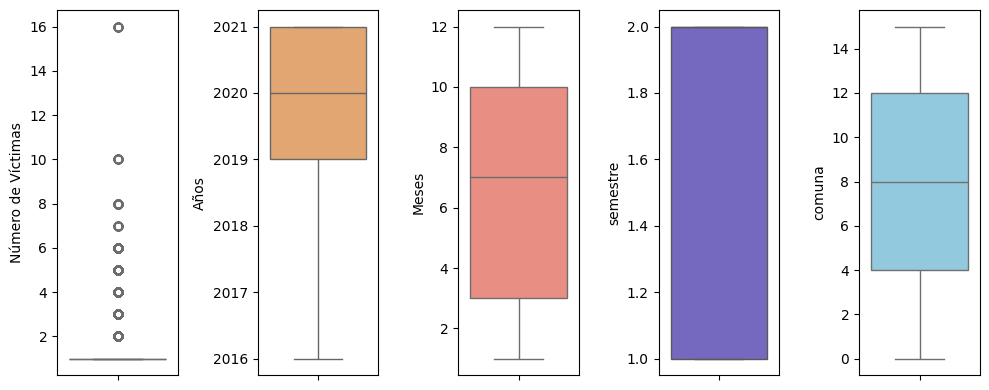

In [24]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=siniestros_df, y='nro_victimas', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=siniestros_df, y='year', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=siniestros_df, y='month', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=siniestros_df, y='semester', color = "#6A5ACD")
plt.ylabel('semestre')

plt.subplot(1, 5, 5) 
sns.boxplot(data=siniestros_df, y='comuna', color = "#87CEEB")
plt.ylabel('comuna')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

In [25]:
# Encontrar el máximo número de víctimas
max_victimas = siniestros_df['nro_victimas'].max()

# Filtrar el DataFrame para obtener solo las filas con el máximo número de víctimas
siniestros_max_victimas = siniestros_df[siniestros_df['nro_victimas'] == max_victimas]

# Mostrar el resultado
print(siniestros_max_victimas)


         id_siniestro  nro_victimas      fecha  franja_hora tipo_calle  \
3441  LC-2019-0188476            16 2019-03-26           17        NaN   
3442  LC-2019-0188476            16 2019-03-26           17        NaN   
3443  LC-2019-0188476            16 2019-03-26           17        NaN   
3444  LC-2019-0188476            16 2019-03-26           17        NaN   
3445  LC-2019-0188476            16 2019-03-26           17        NaN   
3446  LC-2019-0188476            16 2019-03-26           17        NaN   
3447  LC-2019-0188476            16 2019-03-26           17        NaN   
3448  LC-2019-0188476            16 2019-03-26           17        NaN   
3449  LC-2019-0188476            16 2019-03-26           17        NaN   
3450  LC-2019-0188476            16 2019-03-26           17        NaN   
3451  LC-2019-0188476            16 2019-03-26           17        NaN   
3452  LC-2019-0188476            16 2019-03-26           17        NaN   
3453  LC-2019-0188476            16 20

#### Matriz de correlación de variables

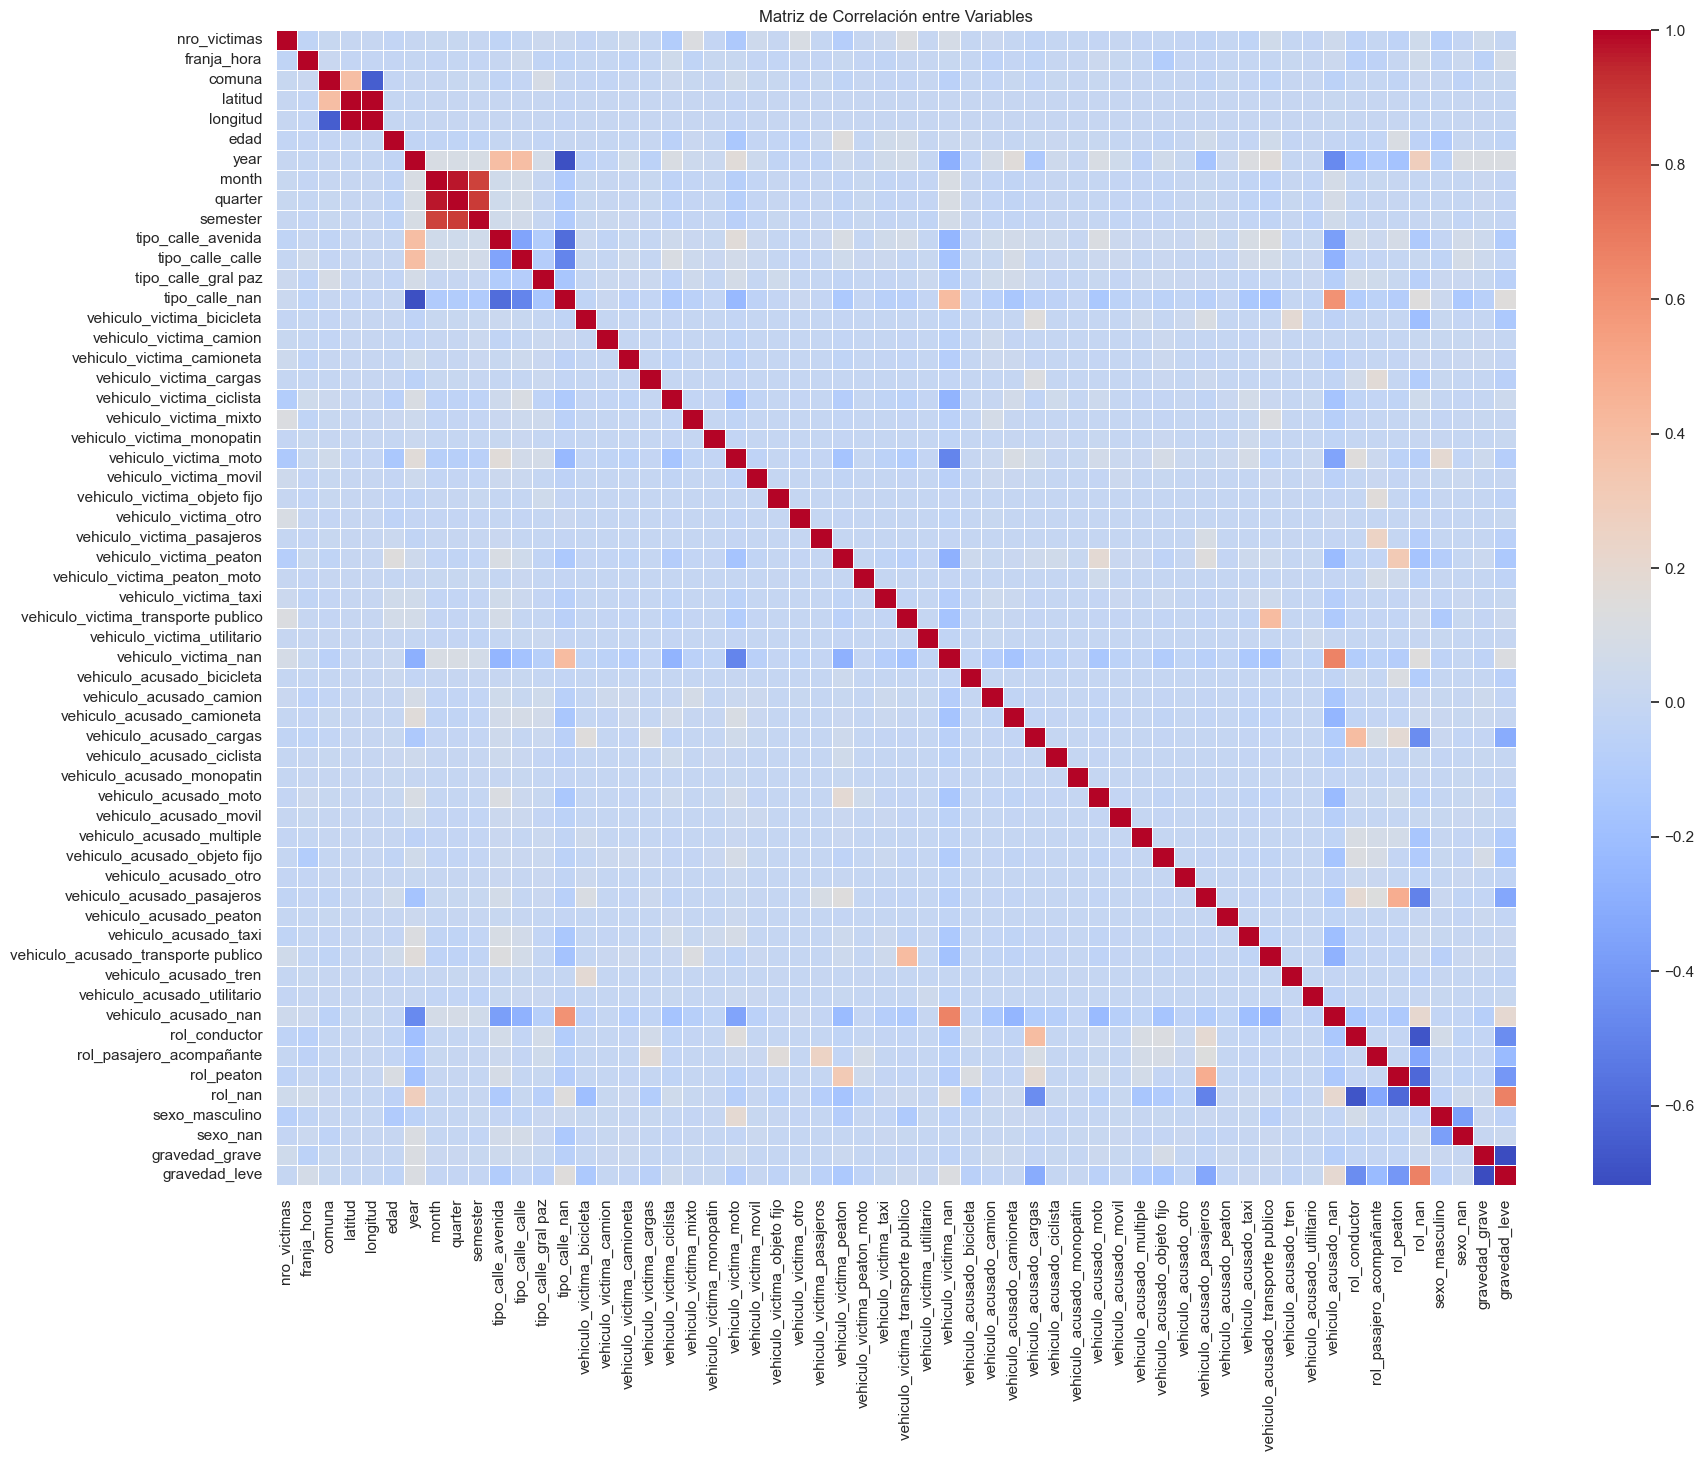

In [ ]:
# Cargar el archivo CSV
file_path = 'DataSets/siniestros_viales.csv'  # Asegúrate de colocar la ruta correcta
df = pd.read_csv(file_path)

# Seleccionar las columnas categóricas
categorical_cols = ['tipo_calle', 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo', 'gravedad']

# Realizar one-hot encoding en las columnas categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Seleccionar las columnas numéricas y combinarlas con las codificadas
numeric_cols = ['nro_victimas', 'franja_hora', 'comuna', 'latitud', 'longitud', 'edad', 'year', 'month', 'quarter', 'semester']
df_encoded = df[numeric_cols].join(encoded_df)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()




<Axes: xlabel='nro_victimas'>

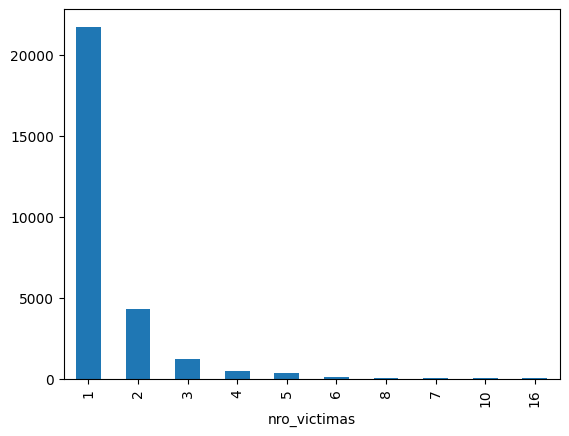

In [26]:
#Ver la distribución de frecuencias de valores en una columna.
siniestros_df['nro_victimas'].value_counts().plot(kind='bar')


In [27]:
siniestros_df[siniestros_df["id_siniestro"] == "LC-2019-0188476"]

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester,id_victima
3441,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,femenino,76,leve,2019,3,1,1,1
3442,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,masculino,76,leve,2019,3,1,1,2
3443,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,femenino,25,leve,2019,3,1,1,3
3444,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,masculino,54,leve,2019,3,1,1,4
3445,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,femenino,29,leve,2019,3,1,1,5
3446,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,femenino,45,leve,2019,3,1,1,6
3447,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,masculino,32,leve,2019,3,1,1,7
3448,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,femenino,21,leve,2019,3,1,1,8
3449,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,femenino,47,leve,2019,3,1,1,9
3450,LC-2019-0188476,16,2019-03-26,17,NaN,12,-58.509738,-34.574865,NaN,NaN,NaN,masculino,66,leve,2019,3,1,1,10


__Conclusiones__
Con relación al análisis de Outliers o valores atípicos realizado anteriormente, se evidenció que hubo un accidente en la comuna 12 donde 16 personas resultaron lesionadas. Por consiguiente se verificó el dato y todos son producto del mismo accidente. (Quizá un colectivo)

### 8. Análisis Descriptivo

__La importancia de esta etapa radica en los siguientes:__

1) __Comprensión inicial:__ Proporcionar una visión general de las características, tendencias y patrones presentes en el conjunto de datos, permitiendo familiarizarse con la información y detectar anomalías o inconsistencias.

2) __Preparación para análisis posteriores:__ Facilitar la identificación de variables relevantes, la transformación de datos y la selección de técnicas de modelado adecuadas, sentando las bases para un análisis estadístico más profundo y la construcción de modelos predictivos confiables.

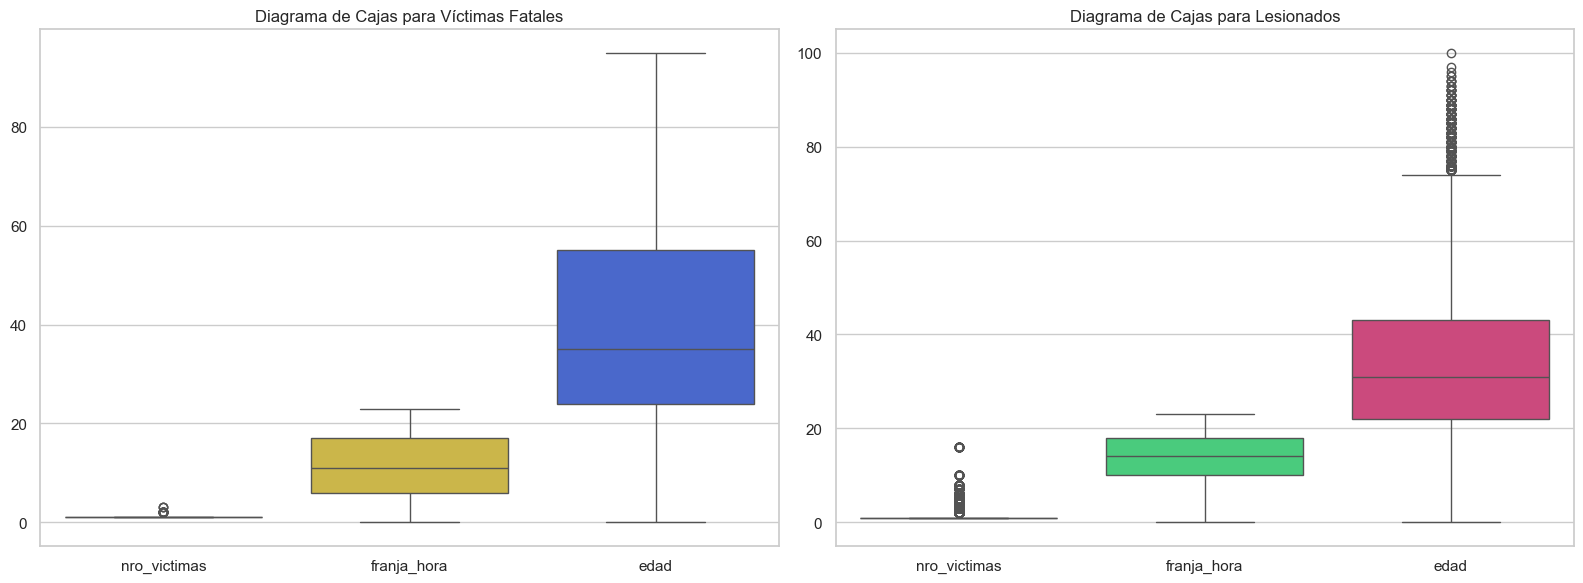

In [28]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].drop(columns=['comuna', 'id_victima'])

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].drop(columns=['comuna', 'id_victima'])

# Seleccionar columnas numéricas para el boxplot
columns_of_interest = ['nro_victimas', 'franja_hora', 'edad']

# Llenar los valores nulos con ceros para Víctimas Fatales
siniestros_fatal_filled = siniestros_fatal[columns_of_interest].fillna(0)

# Llenar los valores nulos con ceros para Lesionados
siniestros_lesionados_filled = siniestros_lesionados[columns_of_interest].fillna(0)

# Configurar la disposición de subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Crear un diagrama de cajas para Víctimas Fatales
sns.boxplot(data=siniestros_fatal_filled, ax=axes[0], palette=['#345CE0', '#E0C534'])
axes[0].set_title('Diagrama de Cajas para Víctimas Fatales')

# Crear un diagrama de cajas para Lesionados
sns.boxplot(data=siniestros_lesionados_filled, ax=axes[1], palette=['#E03479', '#34E078'])
axes[1].set_title('Diagrama de Cajas para Lesionados')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [29]:
siniestros_df

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester,id_victima
0,2016-0001,1,2016-01-01,4,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19,fatal,2016,1,1,1,1
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70,fatal,2016,1,1,1,1
2,2016-0003,1,2016-01-03,7,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30,fatal,2016,1,1,1,1
3,2016-0004,1,2016-01-10,0,avenida,8,-58.46503904,-34.68092974,moto,NaN,conductor,masculino,18,fatal,2016,1,1,1,1
4,2016-0005,1,2016-01-21,5,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29,fatal,2016,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28311,LC-2021-0652865,2,2021-12-31,19,avenida,9,-58.488327,-34.641753,NaN,NaN,NaN,masculino,28,leve,2021,12,4,2,1
28312,LC-2021-0652865,2,2021-12-31,19,avenida,9,-58.488327,-34.641753,NaN,NaN,NaN,masculino,52,leve,2021,12,4,2,2
28313,LC-2021-0652907,1,2021-12-31,20,NaN,1,-58.382894,-34.583083,NaN,NaN,NaN,masculino,23,leve,2021,12,4,2,1
28314,LC-2021-0652921,1,2021-12-31,22,calle,5,-58.414532,-34.614288,moto,transporte publico,NaN,masculino,31,grave,2021,12,4,2,1


Debido que las columnas latitud y longitud no estaban en el formato correcto, se realiza la transformación a float64, de manera que luego puedan ser usadas de forma correcta.

In [30]:
# Convertir las columnas latitud y longitud a valores flotantes y si hay un error convertir a NaN
siniestros_df['longitud'] = pd.to_numeric(siniestros_df['longitud'], errors='coerce')
siniestros_df['latitud'] = pd.to_numeric(siniestros_df['latitud'], errors='coerce')

# Revisar el tipo de datos
print(siniestros_df['longitud'].dtype)

print(siniestros_df['latitud'].dtype)


float64
float64


Corrijo el orden de las columnas latitud y longitud para evitar contratiempos más adelante.

In [31]:
organizar = ['id_siniestro', 'nro_victimas', 'fecha', 'franja_hora', 'tipo_calle', 'comuna', 'latitud', 'longitud',
             'vehiculo_victima','vehiculo_acusado','rol','sexo','edad','gravedad',"year","month","quarter","semester","id_victima"]

siniestros_df = siniestros_df[organizar]

id_siniestro	nro_victimas	fecha	franja_hora	tipo_calle	comuna	longitud	latitud	vehiculo_victima	vehiculo_acusado	rol	sexo	edad	gravedad	year	month	quarter	semester	id_victima

In [32]:
# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].drop(columns=['comuna', 'id_victima'])

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].drop(columns=['comuna', 'id_victima'])

__Análisis de víctimas usando el método "describe"__

In [33]:
siniestros_fatal.describe()

,nro_victimas,fecha,franja_hora,latitud,longitud,edad,year,month,quarter,semester
count,719.0,719,718.0,706.000000,706.000000,666.0,719.000000,719.000000,719.000000,719.000000
mean,1.061196,2018-09-10 22:09:50.820584192,11.559889,-34.619819,-58.441597,42.145646,2018.179416,6.688456,2.549374,1.515994
min,1.0,2016-01-01 00:00:00,0.0,-34.705250,-58.529942,1.0,2016.000000,1.000000,1.000000,1.000000
25%,1.0,2017-04-02 00:00:00,6.0,-34.644041,-58.476297,27.0,2017.000000,4.000000,2.000000,1.000000
50%,1.0,2018-07-10 00:00:00,11.0,-34.622866,-58.444513,37.0,2018.000000,7.000000,3.000000,2.000000
75%,1.0,2019-12-28 00:00:00,17.0,-34.597071,-58.401841,56.0,2019.500000,10.000000,4.000000,2.000000
max,3.0,2021-12-30 00:00:00,23.0,-34.534654,-58.356082,95.0,2021.000000,12.000000,4.000000,2.000000
std,0.256686,NaN,6.691543,0.035374,0.046420,19.764891,1.673093,3.578062,1.142980,0.500092


__Conclusiones del resumen estadístico__
1) El promedio de víctimas es de 1.06, esto no quiere decir que no hayan accidentes que involucren otras vícimas pero si que es el accidente con el resultado más frecuente.
2) El máximo número de muertes es de 3, lo que sugiere que han habido algunos accidentes con múltiples víctimas.
3) Los datos disponibles están a partir del año 2016 hasta 2021.
4) La edad promedio de las víctimas está en 42 años, sin embargo la víctima más jóven es 1 año de edad, lo que sugiere que han habido niños incolucrados.
5) La mayor edad de muerte regístrada involucra a víctimas de 95 años, lo que sugiere que hay personas de la tercera edad entre las víctimas
6) La fecha media de los accidentes cae en septiembre, lo que sugiere una posible tendencia estacional.
7) El mes medio de accidentes es julio, lo que respalda aún más la posibilidad de una mayor incidencia de accidentes durante los meses de invierno.
8) La distribución de accidentes entre trimestres y semestres puede revelar patrones relacionados con vacaciones, horarios escolares u otros factores.

__Análisis de personas lesionadas usando el método "describe"__

In [34]:
siniestros_lesionados.describe()

,nro_victimas,fecha,franja_hora,latitud,longitud,edad,year,month,quarter,semester
count,27597.0,27597,27588.0,2.594100e+04,2.594100e+04,23126.0,27597.000000,27597.000000,27597.000000,27597.000000
mean,1.42251,2020-05-27 16:10:41.808892416,13.546216,-1.339111e+05,-2.247978e+05,37.72572,2019.897126,6.617821,2.537993,1.525492
min,1.0,2019-01-01 00:00:00,0.0,-3.472891e+09,-5.829963e+09,0.0,2019.000000,1.000000,1.000000,1.000000
25%,1.0,2019-07-13 00:00:00,10.0,-3.463412e+01,-5.847814e+01,27.0,2019.000000,3.000000,1.000000,1.000000
50%,1.0,2020-03-17 00:00:00,14.0,-3.461361e+01,-5.844259e+01,35.0,2020.000000,7.000000,3.000000,2.000000
75%,1.0,2021-04-05 00:00:00,18.0,-3.459119e+01,-5.840545e+01,46.0,2021.000000,10.000000,4.000000,2.000000
max,16.0,2021-12-31 00:00:00,23.0,-3.453466e+01,-5.835346e+01,100.0,2021.000000,12.000000,4.000000,2.000000
std,1.087882,NaN,5.596658,2.156243e+07,3.619699e+07,15.217116,0.860946,3.479185,1.136078,0.499359


__Conclusiones del resumen estadístico__

1) El número promedio de heridos por accidente es de 1,42251, lo que indica que la mayoría de los accidentes involucran a una sola persona lesionada.
2) El número máximo de heridos es de 16, lo que sugiere que ha habido algunos accidentes con heridos múltiples.
3) Los datos abarcan de 2016 a 2021, sin información sobre accidentes antes de 2016 o después de 2021.
4) La edad promedio de una persona lesionada es 37,72572, lo que indica que la mayoría de las lesiones involucran a adultos.
5) La edad mínima de una persona lesionada es 0, lo que sugiere que también ha habido lesiones a bebés y niños.
6) La edad máxima de una persona lesionada es de 100 años, lo que implica que las personas mayores también están implicadas en accidentes de tráfico.
7) La fecha media de los accidentes cae en mayo, lo que sugiere una posible tendencia estacional.
8) El mes medio de accidentes es marzo, lo que respalda aún más la posibilidad de una mayor incidencia de accidentes durante los meses de otoño.

### 9. Análisis de distribución univariable

__Siniestros por año__

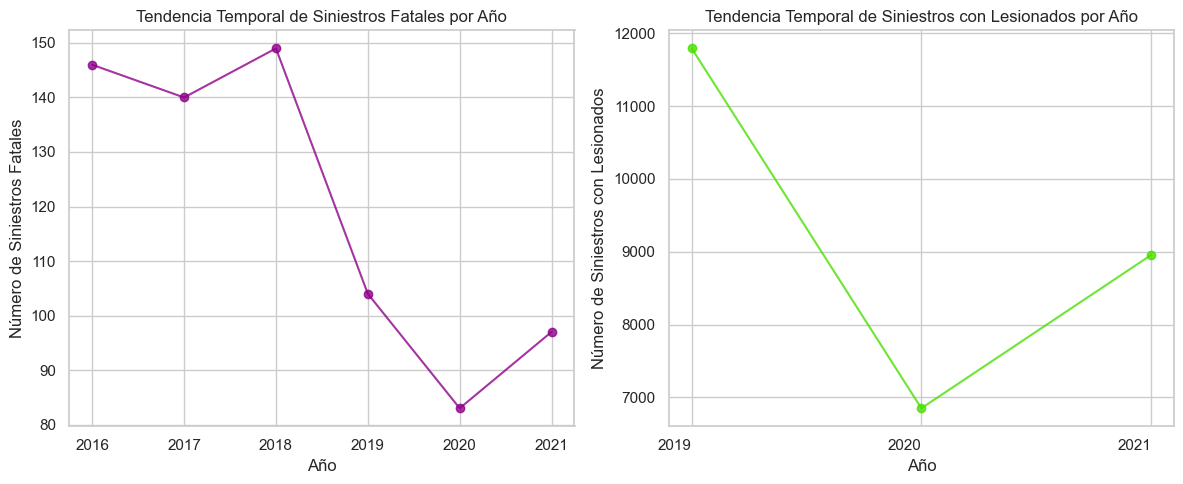

In [35]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Agrupar por año y contar el número de siniestros en cada año
siniestros_fatal_por_anio = siniestros_fatal.groupby(siniestros_fatal['year']).size()
siniestros_lesionados_por_anio = siniestros_lesionados.groupby('year').size()

# Crear dos gráficos diferentes
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_anio.index, siniestros_fatal_por_anio, label='Fatal', marker='o', alpha=0.8, color='#8F008B')
plt.title('Tendencia Temporal de Siniestros Fatales por Año')
plt.xlabel('Año')
plt.ylabel('Número de Siniestros Fatales')
plt.grid(True)

# Segundo gráfico para siniestros con víctimas lesionadas
plt.subplot(1, 2, 2)
plt.plot(siniestros_lesionados_por_anio.index, siniestros_lesionados_por_anio, label='Lesionados', marker='o', alpha=0.8, color='#49E000')
plt.title('Tendencia Temporal de Siniestros con Lesionados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Siniestros con Lesionados')
plt.grid(True)

# Establecer las etiquetas del eje x
plt.xticks(siniestros_lesionados_por_anio.index, [str(int(x)) for x in siniestros_lesionados_por_anio.index], ha='right')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

__El gráfico muestra dos tendencias:__

__Tendencia Temporal de Siniestros Fatales por Año:__ Esta línea representa el número de siniestros con víctimas fatales en la ciudad de Buenos Aires para cada año desde 2016 hasta 2021.

__Tendencia Temporal de Siniestros con Lesionados por Año:__ Esta línea representa el número de siniestros con víctimas lesionadas en la ciudad de Buenos Aires para cada año desde 2019 hasta 2021.

__Análisis:__

__Siniestros fatales:__

Se observa una tendencia creciente en el número de siniestros fatales entre 2016 y 2018 (ligera tendencia a la baja en el año 2017), seguido de una súbita caída hacia el año 2019 y deja 2020 como el año de menor accidentalidad y fatalidades.

El año 2020 se considera el punto más bajo de todos con alrededor de 85 muertes ese año. Es importante anotar que el año 2020 coincidió con la pandemia del covid 19, y en Argéntina se decretó el confinamiento el 3 de marzo de 2020, lo cual mantuvo a la población en confinanmiento extendido.

Hacia el año 2021 se evidencia un aumento nuevamente en la tendencia de accidentes con víctimas fatales, quizá por la flexibilización de las medidas de confinamiento que permitieron a la población comenzar a recuperar la normalidad. 

__Siniestros con lesionados:__

Se evidencia una fuerte caída en el número de siniestros con personas lesionadas entre el año 2019 a 2020. con una fuerte recuperación hacia 2021.



__Siniestros por mes__

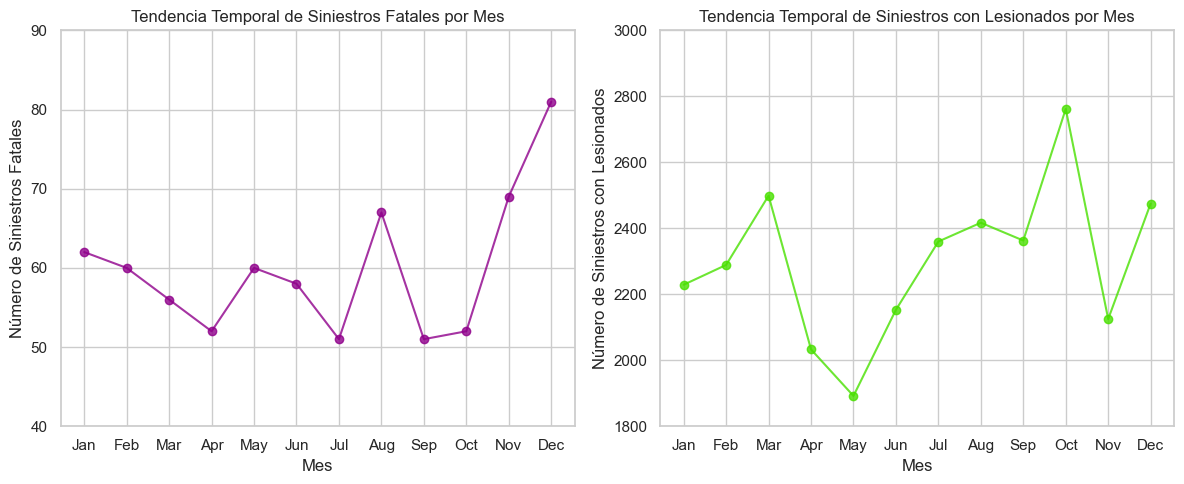

In [36]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Agrupar por mes y contar el número de siniestros en cada mes
siniestros_fatal_por_mes = siniestros_fatal.groupby(siniestros_fatal['month']).size()
siniestros_lesionados_por_mes = siniestros_lesionados.groupby('month').size()

# Crear dos gráficos diferentes
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por mes
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_mes.index, siniestros_fatal_por_mes, label='Fatal', marker='o', alpha=0.8, color='#8F008B')
plt.title('Tendencia Temporal de Siniestros Fatales por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros Fatales')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(40, 90)  # Ajustar el rango del eje y
plt.grid(True)

# Segundo gráfico para siniestros con víctimas lesionadas por mes
plt.subplot(1, 2, 2)
plt.plot(siniestros_lesionados_por_mes.index, siniestros_lesionados_por_mes, label='Lesionados', marker='o', alpha=0.8, color='#49E000')
plt.title('Tendencia Temporal de Siniestros con Lesionados por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros con Lesionados')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(1800, 3000)  # Ajustar el rango del eje y
plt.grid(True)

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

__Conclusiones__

Revisamos los accidentes mes a mes para detectar patrones estacionales en su frecuencia.

En los accidentes fatales, diciembre, noviembre y agosto son los meses con más casos, en comparación con abril, septiembre y octubre. Para los accidentes con lesiones, marzo, agosto, octubre y diciembre tienen la mayor cantidad de incidentes, mientras que abril y mayo tienen la menor cantidad.

__Siniestros por Franja Horaria__

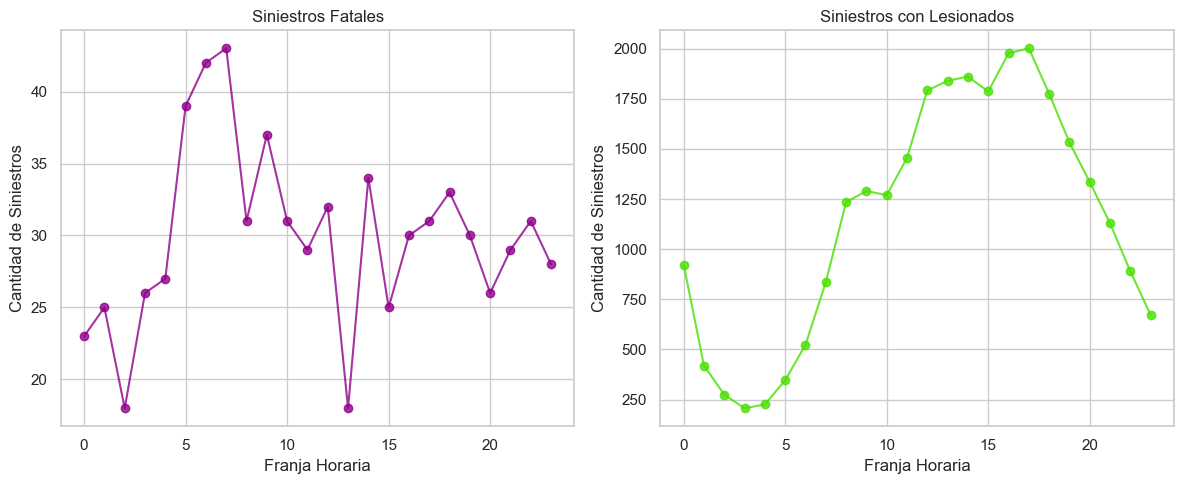

In [37]:
# Filtrar siniestros con víctimas fatales y eliminar filas con valores nulos en 'franja_hora'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].dropna(subset=['franja_hora'])

# Filtrar siniestros con víctimas lesionadas y eliminar filas con valores nulos en 'franja_hora'
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].dropna(subset=['franja_hora'])

# Obtener todas las franjas horarias presentes en ambas categorías de siniestros
franjas_horarias = np.union1d(siniestros_fatal['franja_hora'].unique(), siniestros_lesionados['franja_hora'].unique())

# Contar la cantidad de siniestros fatales por franja horaria y rellenar valores faltantes con 0
fatal_por_horario = siniestros_fatal.groupby('franja_hora').size().reindex(franjas_horarias, fill_value=0)

# Contar la cantidad de siniestros con lesionados por franja horaria y rellenar valores faltantes con 0
lesionados_por_horario = siniestros_lesionados.groupby('franja_hora').size().reindex(franjas_horarias, fill_value=0)

# Configurar la figura y los subgráficos para la visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar siniestros fatales con una línea roja y menor intensidad de color
axes[0].plot(franjas_horarias, fatal_por_horario, label='Fatal', color='#8F008B', alpha=0.8, marker='o')
axes[0].set_title('Siniestros Fatales')
axes[0].set_xlabel('Franja Horaria')
axes[0].set_ylabel('Cantidad de Siniestros')
axes[0].grid(True)

# Graficar siniestros con lesionados con una línea azul y menor intensidad de color
axes[1].plot(franjas_horarias, lesionados_por_horario, label='Lesionados', color='#49E000', alpha=0.8, marker='o')
axes[1].set_title('Siniestros con Lesionados')
axes[1].set_xlabel('Franja Horaria')
axes[1].set_ylabel('Cantidad de Siniestros')
axes[1].grid(True)

# Ajustar el diseño de los subgráficos para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos generados
plt.show()


__Conclusiones__

En los accidentes con lesionados, se observa un patrón claro en las horas del día. Los accidentes aumentan constantemente desde las 4 a.m. hasta las 6 p.m., alcanzando su pico durante este periodo. Después de las 6 p.m., los accidentes disminuyen gradualmente hasta el final del día. Las horas con más accidentes no fatales son de 12 p.m. a 5 p.m.

Por otro lado, los accidentes fatales ocurren con mayor frecuencia entre las 6 y 7 a.m. Las horas con menos accidentes fatales son las 2 a.m. y la 1 p.m. Este análisis horario es esencial para entender los momentos más críticos del día y puede ayudar a desarrollar estrategias de prevención específicas según la gravedad de los accidentes.

__Siniestros por tipo de Calle__

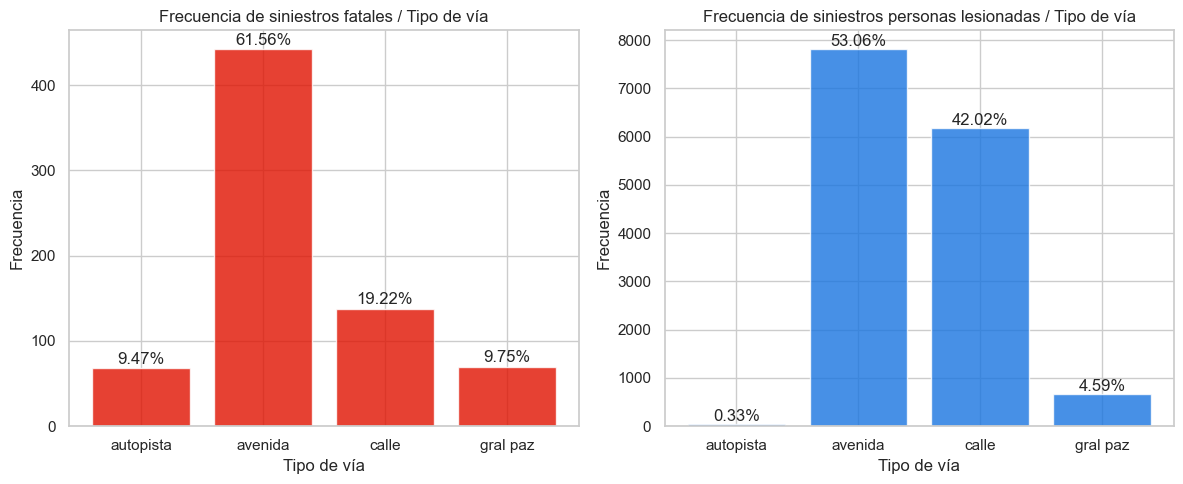

In [38]:
# Filtrar siniestros con víctimas fatales
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar siniestros con víctimas lesionadas
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Contar la cantidad de siniestros por tipo de calle para cada categoría
tipo_calle_fatal = siniestros_fatal['tipo_calle'].value_counts()
tipo_calle_lesionados = siniestros_lesionados['tipo_calle'].value_counts()

# Obtener todos los tipos de calle presentes en los datos
tipos_calle = np.unique(siniestros_df['tipo_calle'].dropna())

# Configurar la figura y los subgráficos para la visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Crear gráfico de barras para siniestros fatales, mostrando frecuencia y porcentaje
frecuencia_fatal = tipo_calle_fatal.reindex(tipos_calle, fill_value=0)
porcentaje_fatal = frecuencia_fatal / frecuencia_fatal.sum() * 100
axes[0].bar(tipos_calle, frecuencia_fatal, color='#E01200', alpha=0.8)
for i, v in enumerate(frecuencia_fatal):
    axes[0].text(i, v + 2, f'{porcentaje_fatal.iloc[i]:.2f}%', ha='center', va='bottom')
axes[0].set_title('Frecuencia de siniestros fatales / Tipo de vía')
axes[0].set_xlabel('Tipo de vía')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Crear gráfico de barras para siniestros con lesionados, mostrando frecuencia y porcentaje
frecuencia_lesionados = tipo_calle_lesionados.reindex(tipos_calle, fill_value=0)
porcentaje_lesionados = frecuencia_lesionados / frecuencia_lesionados.sum() * 100
axes[1].bar(tipos_calle, frecuencia_lesionados, color='#1975E0', alpha=0.8)
for i, v in enumerate(frecuencia_lesionados):
    axes[1].text(i, v + 2, f'{porcentaje_lesionados.iloc[i]:.2f}%', ha='center', va='bottom')
axes[1].set_title('Frecuencia de siniestros personas lesionadas / Tipo de vía')
axes[1].set_xlabel('Tipo de vía')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True)

# Ajustar el diseño de los subgráficos para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos generados
plt.show()


__Conclusiones__

El gráfico anterior permite evidenciar que el tipo de vía que presenta el mayor número de accidentes, son las avenidas. Es es igual tanto para siniestros fatales como para aquellos donde solo se presentan lesiones. Sin embargo el riesgo de sufrir un accidente en este tipo de vía es bastante alto.

Por alguna razón los siniestros son más fatales en las avenidas que en las calles, quizá la velocidad de tránsito puede ser una posible explicación, sumado al volumen de tráfico. Esto se evidencia en que el 42% de los accidentes que se presentan en calles solo terminan con personas lesionadas, frente al 19.22% que terminan como fatales. 

A su vez el hecho de sufrir un accidente en una autopista, representa una probabilidad de 9.47% de un desenlace fatal vs las personas que sufren accidentes en el mismo tipo de vía. 

Con relación con La Avenida General Paz, la taza de siniestros fatales es de 9.75% comparado con el 4.59% de siniestros con lesiones. Resulta interesante que a pesar de ser la vía de comunicación terrestre con mayor caudal de tránsito entre todas las rutas nacionales del país, siendo superada en este sentido únicamente por un breve tramo de la Ruta Nacional 9 entre esta avenida y el Camino de Cintura.1​, la taza de siniestros no sea tan alta. 

__Siniestros por Comuna__

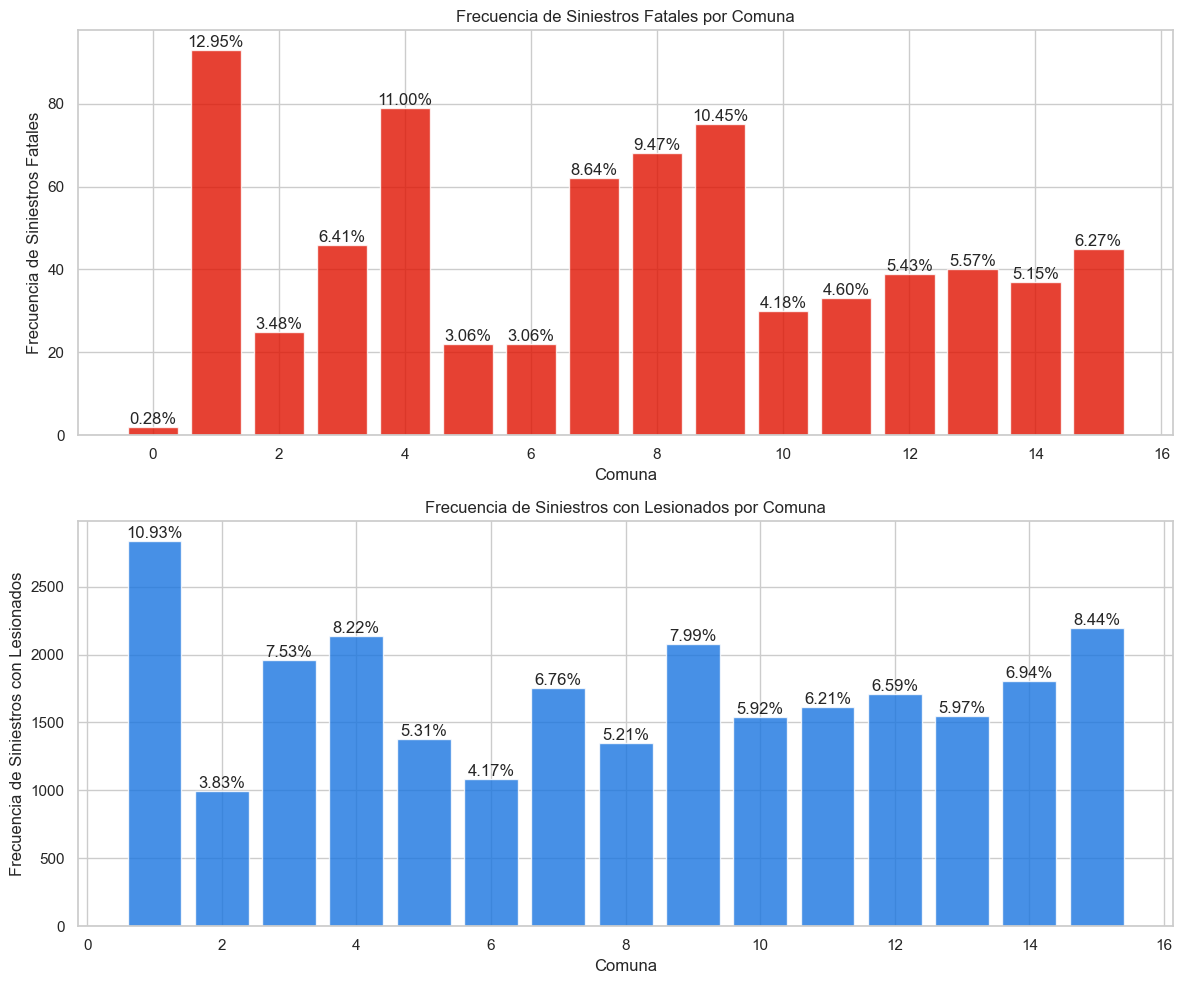

In [39]:
# Filtrar siniestros con víctimas fatales y comuna no nula
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['comuna'].notnull()]

# Filtrar siniestros con víctimas lesionadas y comuna no nula
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal') & siniestros_df['comuna'].notnull()]

# Agrupar por comuna y contar el número de siniestros en cada comuna
siniestros_fatal_por_comuna = siniestros_fatal.groupby('comuna').size()
siniestros_lesionados_por_comuna = siniestros_lesionados.groupby('comuna').size()

# Calcular el porcentaje de siniestros por comuna
porcentaje_fatal = (siniestros_fatal_por_comuna / siniestros_fatal_por_comuna.sum()) * 100
porcentaje_lesionados = (siniestros_lesionados_por_comuna / siniestros_lesionados_por_comuna.sum()) * 100

# Crear una figura con dos gráficos, uno debajo del otro
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de barras para siniestros fatales por comuna
bar1 = ax1.bar(siniestros_fatal_por_comuna.index, siniestros_fatal_por_comuna, color='#E01200', alpha=0.8)
ax1.set_title('Frecuencia de Siniestros Fatales por Comuna')
ax1.set_xlabel('Comuna')
ax1.set_ylabel('Frecuencia de Siniestros Fatales')

# Añadir el porcentaje sobre cada barra
for rect, percentage in zip(bar1, porcentaje_fatal):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Gráfico de barras para siniestros con víctimas lesionadas por comuna
bar2 = ax2.bar(siniestros_lesionados_por_comuna.index, siniestros_lesionados_por_comuna, color='#1975E0', alpha=0.8)
ax2.set_title('Frecuencia de Siniestros con Lesionados por Comuna')
ax2.set_xlabel('Comuna')
ax2.set_ylabel('Frecuencia de Siniestros con Lesionados')

# Añadir el porcentaje sobre cada barra
for rect, percentage in zip(bar2, porcentaje_lesionados):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()


__Conclusiones__

Esta visualización puede simplificar el análisis geográfico y facilitar la identificación de áreas específicas con diferentes tasas de siniestralidad. En los accidentes fatales, observamos que la mayor cantidad de siniestros se concentra en las comunas 1, 4 y 9, mientras que en los siniestros con lesionados, las comunas 1, 15 y 4 son las más afectadas. Es notable que la comuna 4 muestra un patrón recurrente, lo que resulta interesante para un análisis más detallado.







__Siniestros por rol__

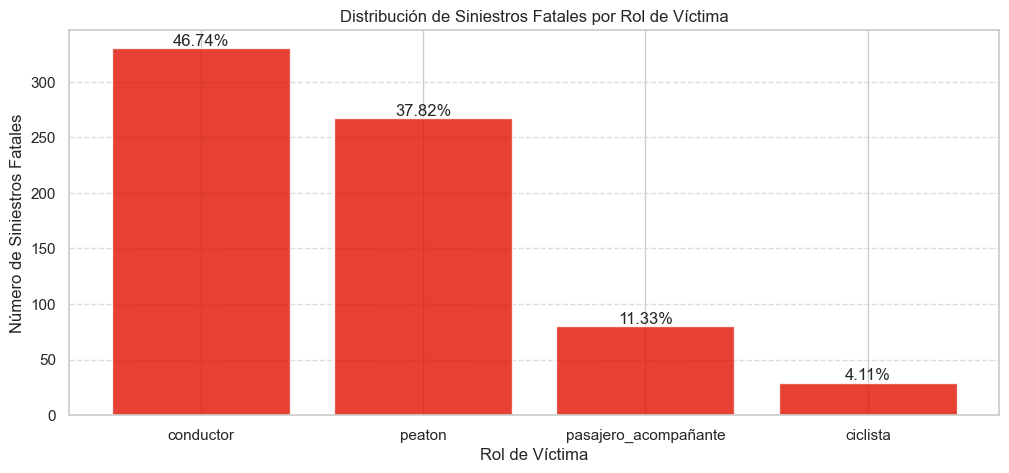

In [40]:
# Filtrar siniestros con gravedad 'fatal' y rol no nulo
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['rol'].notnull()]

# Contar la frecuencia de cada rol de víctima
frecuencia_roles = siniestros_fatal['rol'].value_counts()

# Calcular el porcentaje para cada rol de víctima
porcentaje_roles = (frecuencia_roles / frecuencia_roles.sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(12, 5))
bars = plt.bar(frecuencia_roles.index, frecuencia_roles, color='#E01200', alpha=0.8)

# Alinear las etiquetas del eje x al centro de cada barra
plt.xticks(rotation=0, ha='center')

# Mostrar el porcentaje sobre cada barra
for bar, porcentaje in zip(bars, porcentaje_roles):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{porcentaje:.2f}%',
             ha='center', va='bottom')

plt.title('Distribución de Siniestros Fatales por Rol de Víctima')
plt.xlabel('Rol de Víctima')
plt.ylabel('Número de Siniestros Fatales')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


__Conclusión__
En el caso de la gráfica anterior se evidencia que conductores y peatones tienden a ser las víctimas frecuentes, sin embargo no podemos comparar con siniestros de lesiones porque estos no cuentan con la data suficiente para estas variables. 


__Siniestros por tipo de vehículo de la víctima__

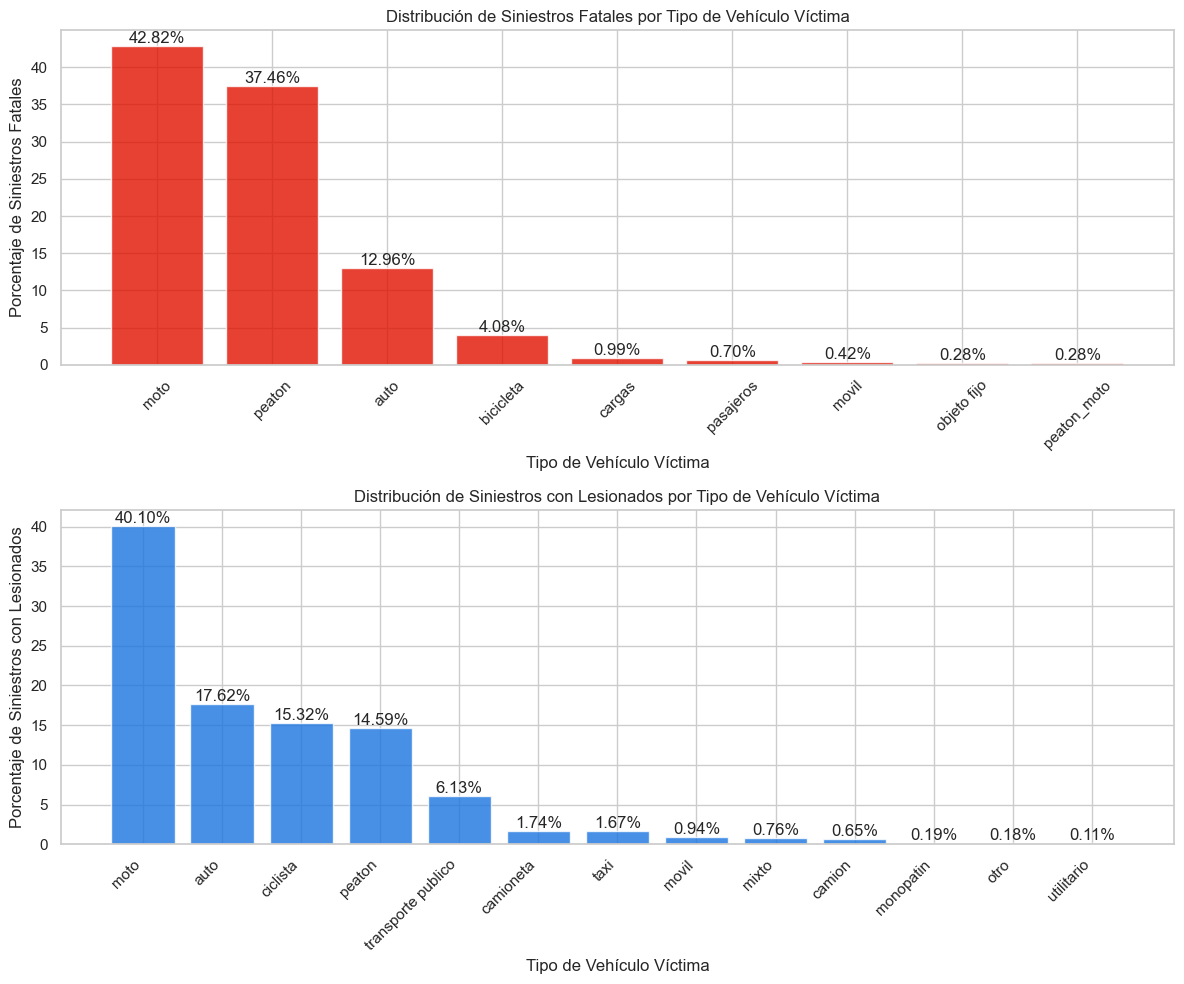

In [41]:
# Filtrar por gravedad igual a 'fatal' y comuna no nula
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal')]

# Filtrar por gravedad diferente de 'fatal' y comuna no nula
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal')]

# Contar la frecuencia de cada tipo de vehículo víctima en siniestros fatales
frecuencia_vehiculo_victima_fatal = siniestros_fatal['vehiculo_victima'].value_counts()

# Contar la frecuencia de cada tipo de vehículo víctima en siniestros con lesionados
frecuencia_vehiculo_victima_lesionados = siniestros_lesionados['vehiculo_victima'].value_counts()

# Calcular los porcentajes
porcentaje_vehiculo_victima_fatal = (frecuencia_vehiculo_victima_fatal / frecuencia_vehiculo_victima_fatal.sum()) * 100
porcentaje_vehiculo_victima_lesionados = (frecuencia_vehiculo_victima_lesionados / frecuencia_vehiculo_victima_lesionados.sum()) * 100

# Filtrar tipos de vehículos con 0.00%
porcentaje_vehiculo_victima_fatal = porcentaje_vehiculo_victima_fatal[porcentaje_vehiculo_victima_fatal > 0]
porcentaje_vehiculo_victima_lesionados = porcentaje_vehiculo_victima_lesionados[porcentaje_vehiculo_victima_lesionados > 0]

# Crear dos gráficos uno debajo del otro
plt.figure(figsize=(12, 10))

# Primer gráfico para vehículos víctima en siniestros fatales
plt.subplot(2, 1, 1)
bars1 = plt.bar(porcentaje_vehiculo_victima_fatal.index, porcentaje_vehiculo_victima_fatal, color='#E01200', alpha=0.8)
plt.title('Distribución de Siniestros Fatales por Tipo de Vehículo Víctima')
plt.xlabel('Tipo de Vehículo Víctima')
plt.ylabel('Porcentaje de Siniestros Fatales')
plt.xticks(rotation=45, ha='center')

# Mostrar porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Segundo gráfico para vehículos víctima en siniestros con lesionados
plt.subplot(2, 1, 2)
bars2 = plt.bar(porcentaje_vehiculo_victima_lesionados.index, porcentaje_vehiculo_victima_lesionados, color='#1975E0', alpha=0.8)
plt.title('Distribución de Siniestros con Lesionados por Tipo de Vehículo Víctima')
plt.xlabel('Tipo de Vehículo Víctima')
plt.ylabel('Porcentaje de Siniestros con Lesionados')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

__Conclusiones__

Ser peatón en la ciudad de Buenos Aires es un riesgo. Son las principales víctimas fatales con un 37.46%, despues de los motociclistas que tienen un 42.82%. Esto refleja una delicada situación, porque los peatones de cierta manera son los actores más pasivos en la vía pero resultan entre los más afectados. 

Los accidentes de automóviles destacan como el tercer tipo de vehículo en accidentes fatales con un 12.96%, es decir que hay casi una relación de 3 a 1 comparado con los accidentes de motocicletas. También la cifra mucho más baja se podría explicar con relación a que en un accidente los vehículos ofrecen mayor protección que una motocicleta o ser peaton. 

Finalmente los ciclistas son el último grupo que tiene accidentes fatales registrados con un 4.08%.

Con relación a los accidentes donde solo hay personas lesionadas, las motocicletas continuan siendo el vehículo que más casos representa con un 40.10%, seguido de los automóviles con un 17.62% de participación, los ciclistas 15.32% y los peatones 14.59%. En consecuencia parece mejor movilizarse en transporte público (incluyendo el taxi) y en vehículos tipo camioneta, que son los que presentan el menor número de pasajeros lesionados en accidentes de tránsito. 

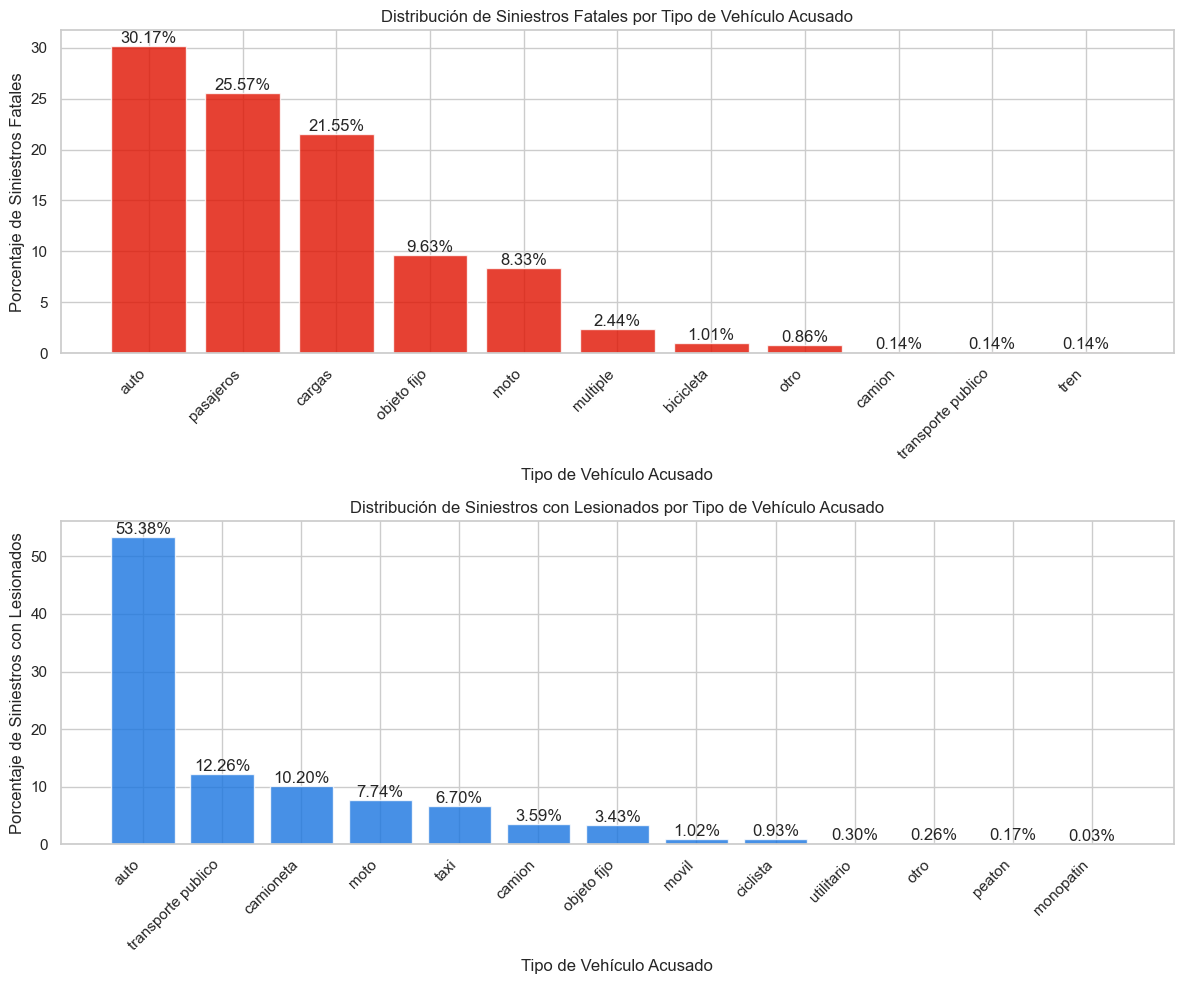

In [42]:
import matplotlib.pyplot as plt

# Filtrar siniestros con gravedad 'fatal' y comuna no nula
siniestros_fatal_nueva = siniestros_df[(siniestros_df['gravedad'] == 'fatal')]

# Filtrar siniestros con gravedad diferente de 'fatal' y comuna no nula
siniestros_lesionados_nueva = siniestros_df[(siniestros_df['gravedad'] != 'fatal')]

# Contar la frecuencia de cada tipo de vehículo acusado en siniestros fatales
frecuencia_vehiculo_acusado_fatal_nueva = siniestros_fatal_nueva['vehiculo_acusado'].value_counts()

# Contar la frecuencia de cada tipo de vehículo acusado en siniestros con lesionados
frecuencia_vehiculo_acusado_lesionados_nueva = siniestros_lesionados_nueva['vehiculo_acusado'].value_counts()

# Calcular los porcentajes
porcentaje_vehiculo_acusado_fatal_nueva = (frecuencia_vehiculo_acusado_fatal_nueva / frecuencia_vehiculo_acusado_fatal_nueva.sum()) * 100
porcentaje_vehiculo_acusado_lesionados_nueva = (frecuencia_vehiculo_acusado_lesionados_nueva / frecuencia_vehiculo_acusado_lesionados_nueva.sum()) * 100

# Filtrar tipos de vehículos con 0.00%
porcentaje_vehiculo_acusado_fatal_nueva = porcentaje_vehiculo_acusado_fatal_nueva[porcentaje_vehiculo_acusado_fatal_nueva > 0]
porcentaje_vehiculo_acusado_lesionados_nueva = porcentaje_vehiculo_acusado_lesionados_nueva[porcentaje_vehiculo_acusado_lesionados_nueva > 0]

# Crear dos gráficos uno debajo del otro
plt.figure(figsize=(12, 10))

# Primer gráfico para vehículos acusados en siniestros fatales
plt.subplot(2, 1, 1)
bars1 = plt.bar(porcentaje_vehiculo_acusado_fatal_nueva.index, porcentaje_vehiculo_acusado_fatal_nueva, color='#E01200', alpha=0.8)
plt.title('Distribución de Siniestros Fatales por Tipo de Vehículo Acusado')
plt.xlabel('Tipo de Vehículo Acusado')
plt.ylabel('Porcentaje de Siniestros Fatales')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Segundo gráfico para vehículos acusados en siniestros con lesionados
plt.subplot(2, 1, 2)
bars2 = plt.bar(porcentaje_vehiculo_acusado_lesionados_nueva.index, porcentaje_vehiculo_acusado_lesionados_nueva, color='#1975E0', alpha=0.8)
plt.title('Distribución de Siniestros con Lesionados por Tipo de Vehículo Acusado')
plt.xlabel('Tipo de Vehículo Acusado')
plt.ylabel('Porcentaje de Siniestros con Lesionados')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()


__Conclusiones__

Para el caso de éstos vehiculos en los siniestros fatales, tenemos: autos, pasajeros y carga; mientras que para lesionados nuevamente se repite auto seguido de transporte público y camioneta. Debo acotar que esta es otra de la variables con más nulos en el conjunto de lesionado con un 64.92% de valores faltantes.

La gráfica revela una clara distribución de siniestros fatales por tipo de vehículo acusado, con los automóviles y motocicletas como los principales responsables.

Es fundamental implementar medidas de seguridad vial específicas para cada tipo de vehículo, enfocándose en los grupos más vulnerables como motociclistas y peatones.

La educación vial, el control del cumplimiento de las normas de tránsito y la mejora de la infraestructura vial son aspectos clave para reducir la siniestralidad vial en la ciudad de Buenos Aires.

__Siniestro por Género__

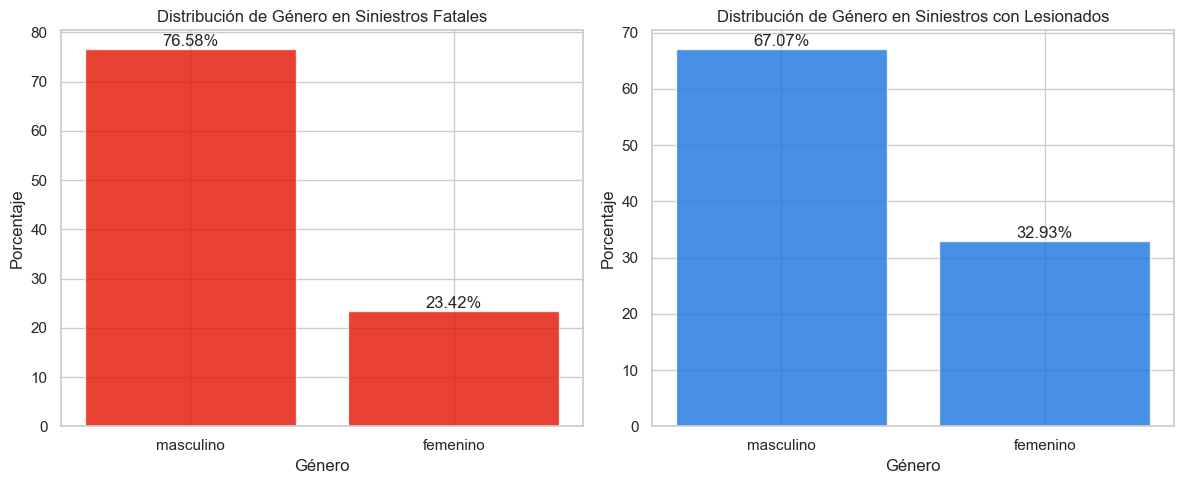

In [43]:
# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['sexo'].notnull()]

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal') & siniestros_df['sexo'].notnull()]

# Contar la frecuencia de cada género en siniestros fatales
frecuencia_genero_fatal = siniestros_fatal['sexo'].value_counts()

# Contar la frecuencia de cada género en siniestros con lesionados
frecuencia_genero_lesionados = siniestros_lesionados['sexo'].value_counts()

# Calcular los porcentajes
porcentaje_genero_fatal = (frecuencia_genero_fatal / frecuencia_genero_fatal.sum()) * 100
porcentaje_genero_lesionados = (frecuencia_genero_lesionados / frecuencia_genero_lesionados.sum()) * 100

# Crear dos gráficos uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por género
plt.subplot(1, 2, 1)
bars1 = plt.bar(porcentaje_genero_fatal.index, porcentaje_genero_fatal, color='#E01200', alpha=0.8)
plt.title('Distribución de Género en Siniestros Fatales')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0, ha='center')

# Mostrar porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Segundo gráfico para siniestros con lesionados por género
plt.subplot(1, 2, 2)
bars2 = plt.bar(porcentaje_genero_lesionados.index, porcentaje_genero_lesionados, color='#1975E0', alpha=0.8)
plt.title('Distribución de Género en Siniestros con Lesionados')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0, ha='center')

# Mostrar porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

__Conclusiones__

__Predominio masculino:__ El 76.58% de las víctimas fatales son hombres, mientras que las mujeres representan el 23.42%.
__Brecha significativa:__ La diferencia de 53.16 puntos porcentuales entre hombres y mujeres evidencia una notable disparidad en la tasa de mortalidad por siniestros viales.

__Siniestros con lesionados:__

**__Menor brecha de género:__** La distribución de género en siniestros con lesionados es menos desigual que en los fatales, con un 67.07% de hombres y un 32.93% de mujeres.
Diferencia de 34.14 puntos porcentuales: La brecha de género en este tipo de siniestros sigue siendo considerable, aunque menor que en los fatales.

__Siniestro por Edad__

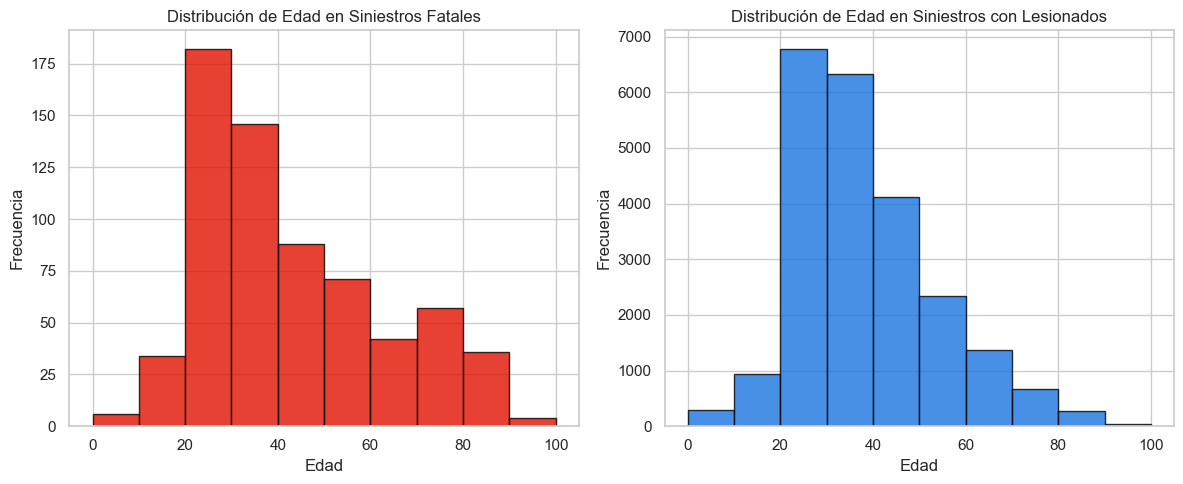

In [44]:
# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['edad'].notnull()]

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal') & siniestros_df['edad'].notnull()]

# Crear dos gráficos uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por edad
plt.subplot(1, 2, 1)
bins_fatal = range(0, 101, 10)  # Crear bins de 10 en 10 años
plt.hist(siniestros_fatal['edad'], bins=bins_fatal, color='#E01200', alpha=0.8, edgecolor='black')
plt.title('Distribución de Edad en Siniestros Fatales')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Segundo gráfico para siniestros con lesionados por edad
plt.subplot(1, 2, 2)
bins_lesionados = range(0, 101, 10)  # Crear bins de 10 en 10 años
plt.hist(siniestros_lesionados['edad'], bins=bins_lesionados, color='#1975E0', alpha=0.8, edgecolor='black')
plt.title('Distribución de Edad en Siniestros con Lesionados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

__Conclusiones__

Para ambos casos de siniestro prevalece el rango de víctimas entre los 20 y los 40 años de edad. Es el grupo de personas con la edad más productiva, lo cual estaría bien profundizar.

__Geolocalización de siniestros__

In [45]:
import folium

# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Eliminar filas con datos nulos en longitud y latitud
siniestros_geograficos = siniestros_fatal.dropna(subset=['longitud', 'latitud'])

# Crear un mapa centrado en el promedio de todas las coordenadas
centro_mapa = [siniestros_geograficos['latitud'].mean(), siniestros_geograficos['longitud'].mean()]
mapa = folium.Map(location=centro_mapa, zoom_start=13)

# Agregar un marcador para cada conjunto de coordenadas
for index, row in siniestros_geograficos.iterrows():
    folium.Marker([row['latitud'], row['longitud']]).add_to(mapa)

# Mostrar el mapa
mapa


__Imágen estática__

A continuación se proporciona una imágen estática de los puntos geolocalizados para que en caso de no poder ejecutar el código anterior, se evidencien dichos puntos en mayor medida a través de la siguiente captura.

[Imágen geolocalización](PI2_DA/Assets/geo_loc.png)

### 10. Carga de dataset a MySQL

In [46]:
# Almacenar el DataFrame unificado

#siniestros_df.to_csv('DataSets/siniestros_viales.csv', index=False)

In [47]:
# Llamar a la función 'create_mysql_db' para importar los datos a MYSql

#create_mysql_db('DataSets/siniestros_viales.csv', 'db_PI_DA', 'siniestros', host='localhost', user='root', password='root1234')